<a href="https://colab.research.google.com/github/Vishwanath200310/CustomerSegmentationOnMarketCampaign/blob/main/MarketingCampaignSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Marketing is one of the crucial fatcor for business operation because it involves increasing in brand value, Customer engagement, Sales and grow Revenue.

One of the problem faced by Marketing team is to identify the customer needs and run personalized campaign based on the customer needs.

# **Solution And Task**

The task is going to be segmenting the customer by using the 6-month customer data from Bank in New York based on the

1) Balance

2) Purchase Amonut and Frequency

3) Transaction History etc....

We are going use K-means Clustering to solve this task.So,that we can segment the customers and run the personalized campaign based on their needs.

# **Importing Dataset And Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [48]:
dataset = pd.read_csv('/content/sample_data/Marketing_data.csv')

In [7]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **Visualization And Data Exploration**

<Axes: >

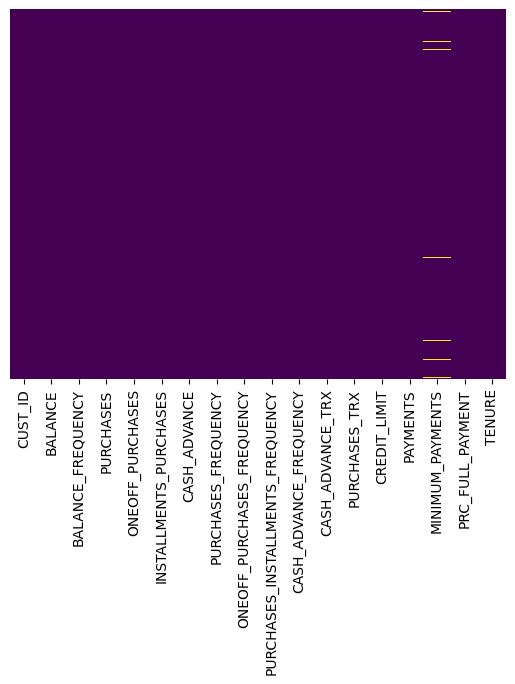

In [14]:
#Let's check the missing values by using heatmap
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
#Filling up the null values with mean value
dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].mean(),inplace=True)
dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].mean(),inplace=True)

<Axes: >

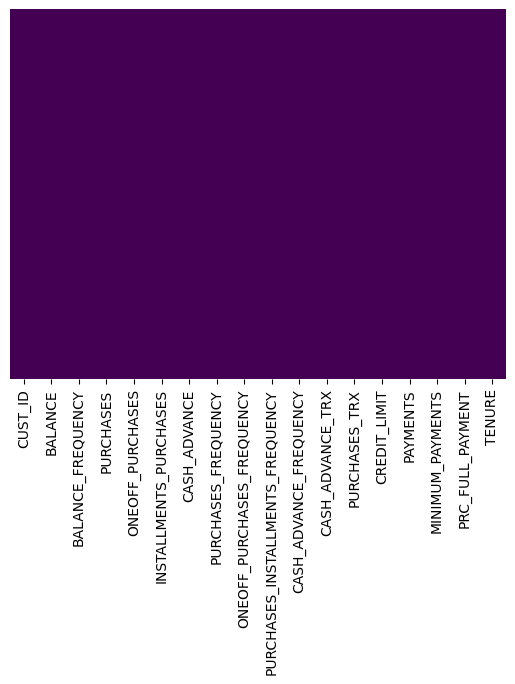

In [18]:
#Let's check the missing values by using heatmap
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
# Dropping CUST_ID colum as it not contain any relavent information
dataset.drop('CUST_ID',axis=1,inplace=True)

<ipython-input-30-dba20aa879c4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
<ipython-input-30-dba20aa879c4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset.columns[i]],kde_kws={'c

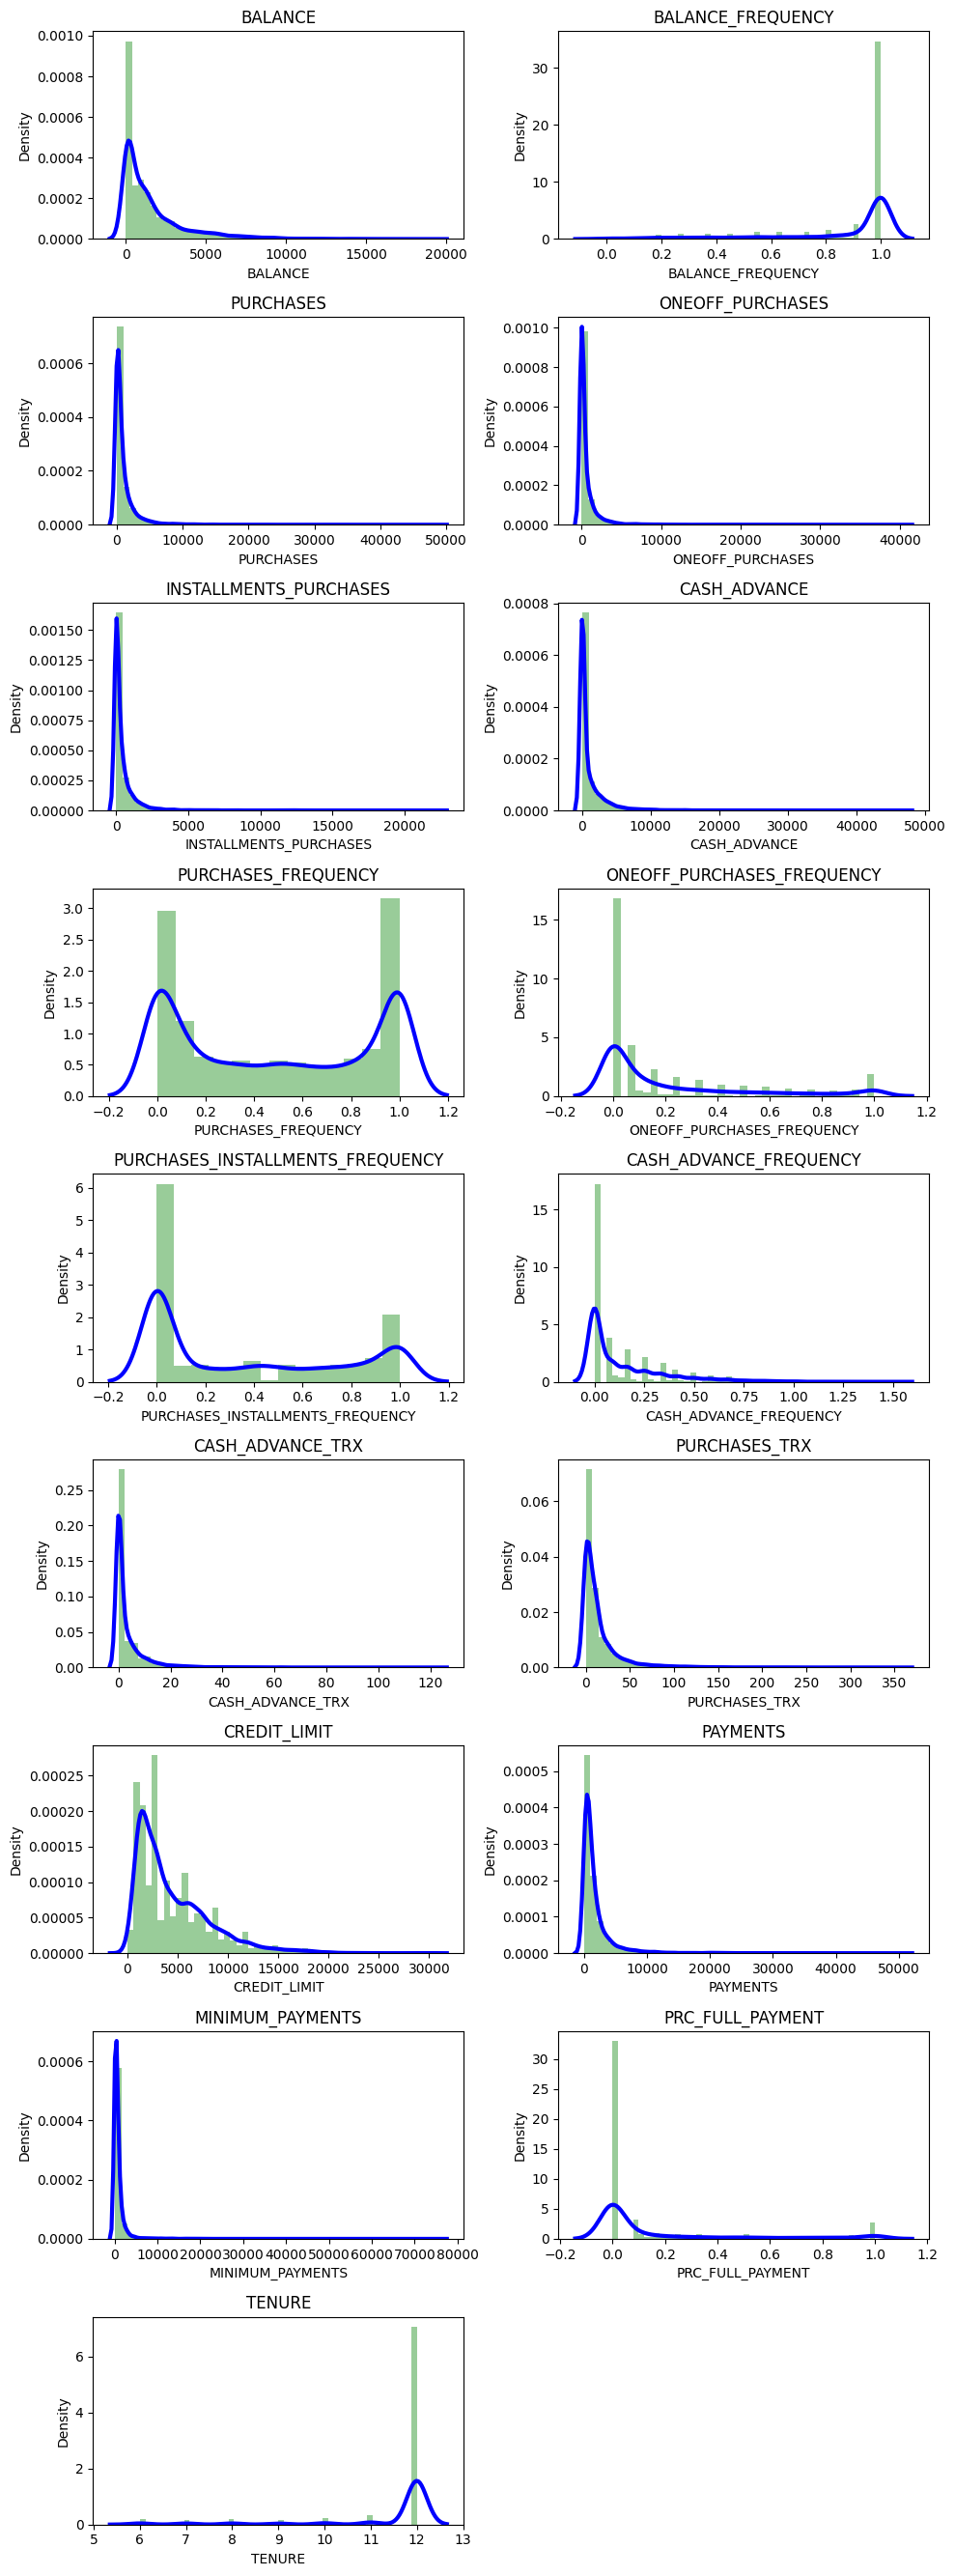

In [30]:
#plotting sns.displot for each columns
plt.figure(figsize=(10,50))
for i in range(len(dataset.columns)):
  plt.subplot(17,2,i+1)
  sns.distplot(dataset[dataset.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
  plt.title(dataset.columns[i])
plt.tight_layout()

<Axes: >

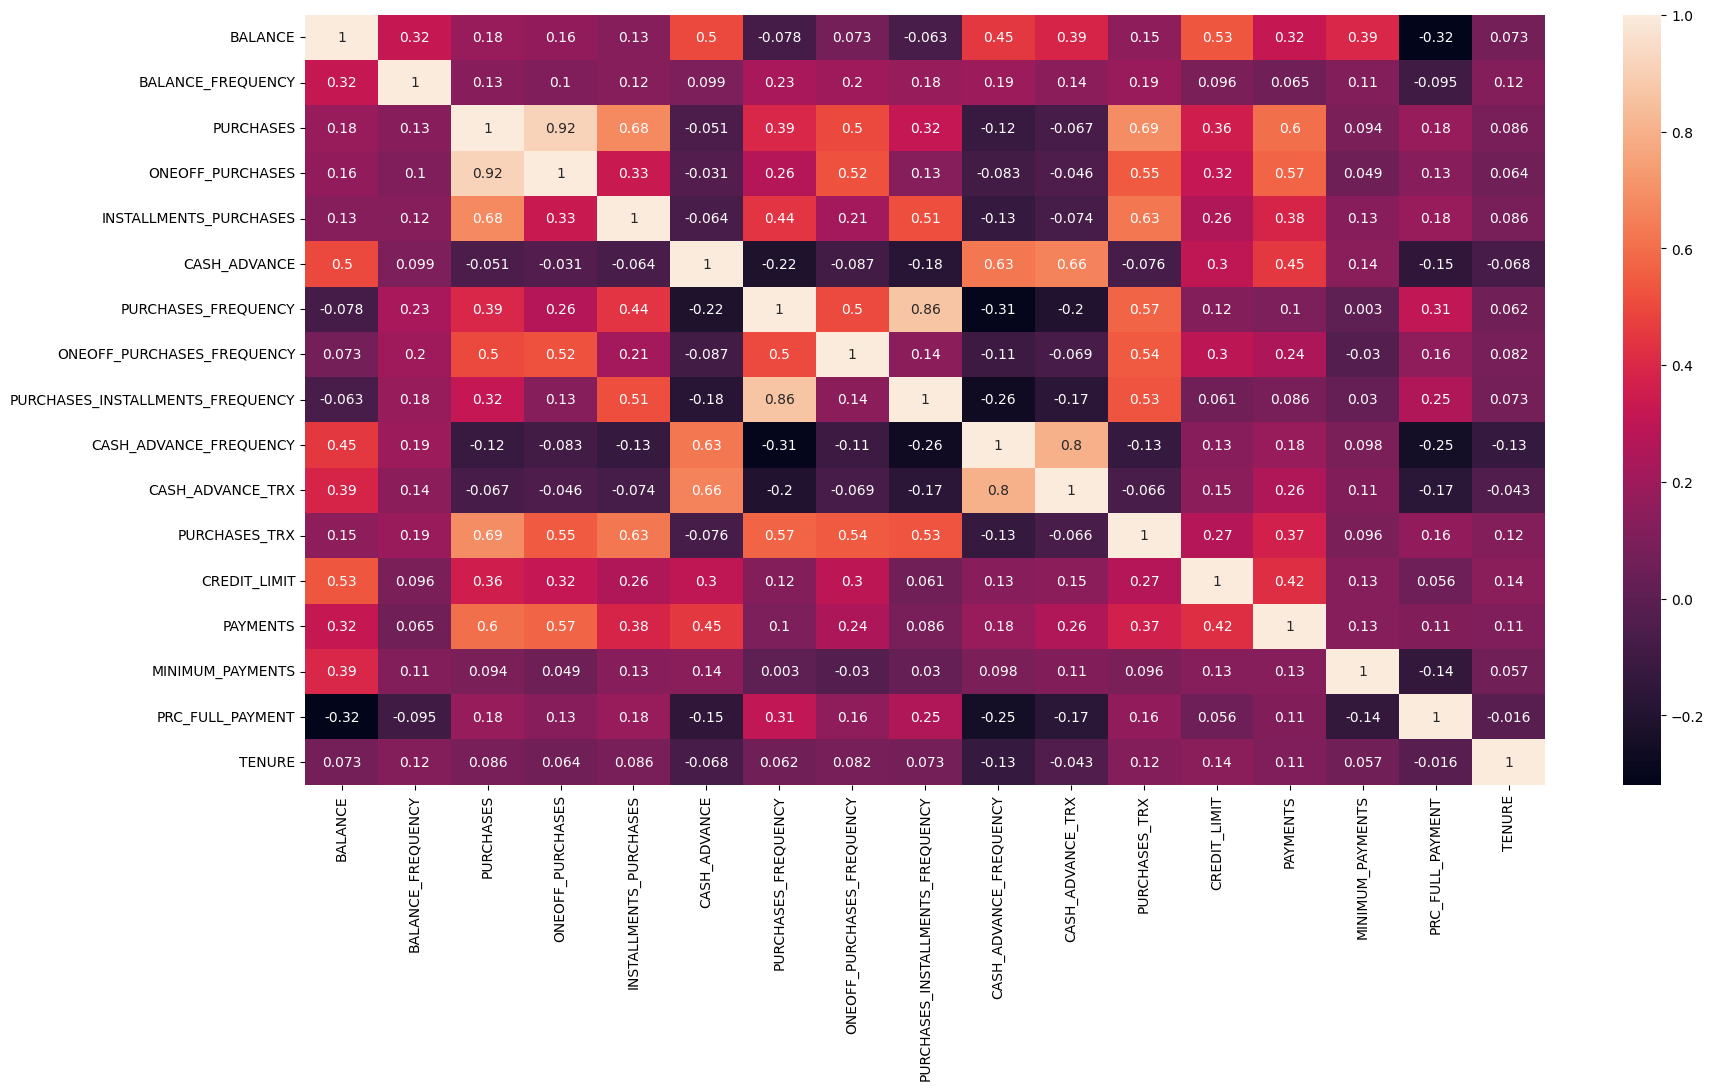

In [34]:
correlation = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True)

# **Finding Optimal NUmber Of Clusters using Elbow Method**

In [51]:
scalar = StandardScaler()
data = scalar.fit_transform(dataset)

In [52]:
data.shape

(8950, 17)

In [53]:
score_i = []
for k in range(2,20):
  kmeans = KMeans(n_clusters=k,random_state=0)
  kmeans.fit(data)
  score_i.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

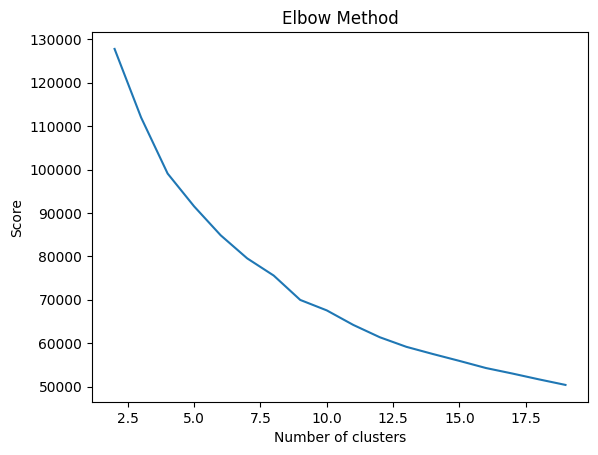

In [54]:
plt.plot(range(2,20),score_i)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

# **Applying K-means Clustering**

In [55]:
kmeans = KMeans(8)
kmeans.fit(data)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
labels

array([4, 3, 2, ..., 7, 7, 7], dtype=int32)

In [57]:
kmeans.cluster_centers_.shape

(8, 17)

In [60]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_,columns = [dataset.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701918,-2.131800,-0.307014,-0.230340,-0.302640,-0.323320,-0.547051,-0.427433,-0.441723,-0.522507,-0.376982,-0.416592,-0.172180,-0.202233,-0.257678,0.293891,0.201050
1,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658
2,0.141901,0.430008,0.950471,0.901022,0.592018,-0.304923,1.093327,1.867565,0.538153,-0.405662,-0.315825,1.204855,0.708653,0.399187,-0.047214,0.454814,0.307809
3,1.669661,0.394220,-0.199456,-0.146069,-0.203342,2.032318,-0.447727,-0.182732,-0.396984,1.946962,1.963880,-0.232551,1.023173,0.857306,0.395015,-0.387940,0.063511
4,0.014841,0.402142,-0.345497,-0.226283,-0.401090,-0.095870,-0.817260,-0.338414,-0.758622,0.097574,-0.032161,-0.467318,-0.296677,-0.244776,-0.042233,-0.452790,0.271106
5,1.290312,0.454124,-0.039755,-0.268864,0.399233,-0.000938,0.022469,-0.528409,0.262206,-0.252602,-0.060885,0.219536,-0.004964,-0.129901,11.641856,-0.525551,0.298409
6,-0.378372,0.331202,-0.043194,-0.231929,0.323795,-0.368857,0.972029,-0.348848,1.160672,-0.477697,-0.363169,0.164031,-0.276257,-0.225917,-0.097488,0.306631,0.252162
7,-0.337794,-0.349455,-0.284231,-0.208737,-0.288211,0.065446,-0.197106,-0.271926,-0.229662,0.302135,-0.002861,-0.385258,-0.557568,-0.390736,-0.209560,0.013756,-3.195855


In [61]:
#performing inverse transformation
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers,columns = [dataset.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,103.490974,0.372267,347.264163,210.119722,137.394062,300.854201,0.270793,0.074946,0.188885,0.030585,0.676198,4.354920,3867.989440,1147.698560,263.699513,0.239673,11.786375
1,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,0.406617,11.962500
2,1859.830315,0.979136,3033.900653,2087.949772,946.422579,339.432336,0.929155,0.759589,0.578313,0.053967,1.093553,44.658019,7072.820183,2888.750005,754.176464,0.286740,11.929245
3,5039.732557,0.970658,577.063595,349.992890,227.188243,5240.736449,0.310656,0.147945,0.206666,0.524751,16.650867,8.929480,8217.172885,4214.960237,1784.772963,0.040249,11.602312
4,1595.365208,0.972534,265.045078,216.853586,48.366485,777.827201,0.162345,0.101502,0.062941,0.154670,3.029349,3.094059,3415.016502,1024.540386,765.785049,0.021281,11.880127
5,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,2.833333,20.166667,4476.388889,1357.092339,27995.061876,0.000000,11.916667
6,776.924412,0.955729,910.919142,207.483460,703.871004,205.360364,0.880473,0.098390,0.825718,0.039552,0.770468,18.787037,3489.312964,1079.135079,637.014863,0.243399,11.854776
7,861.385360,0.794488,395.941226,245.976624,150.442309,1116.114939,0.411243,0.121337,0.273164,0.195605,3.229299,5.133758,2465.787340,602.000784,375.834865,0.157738,7.240446


In [62]:
dataset['cluster'] = labels
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


In [63]:
dataset['cluster'].value_counts()

cluster
4    2826
6    2052
2    1271
0    1188
3     868
7     629
1      80
5      36
Name: count, dtype: int64

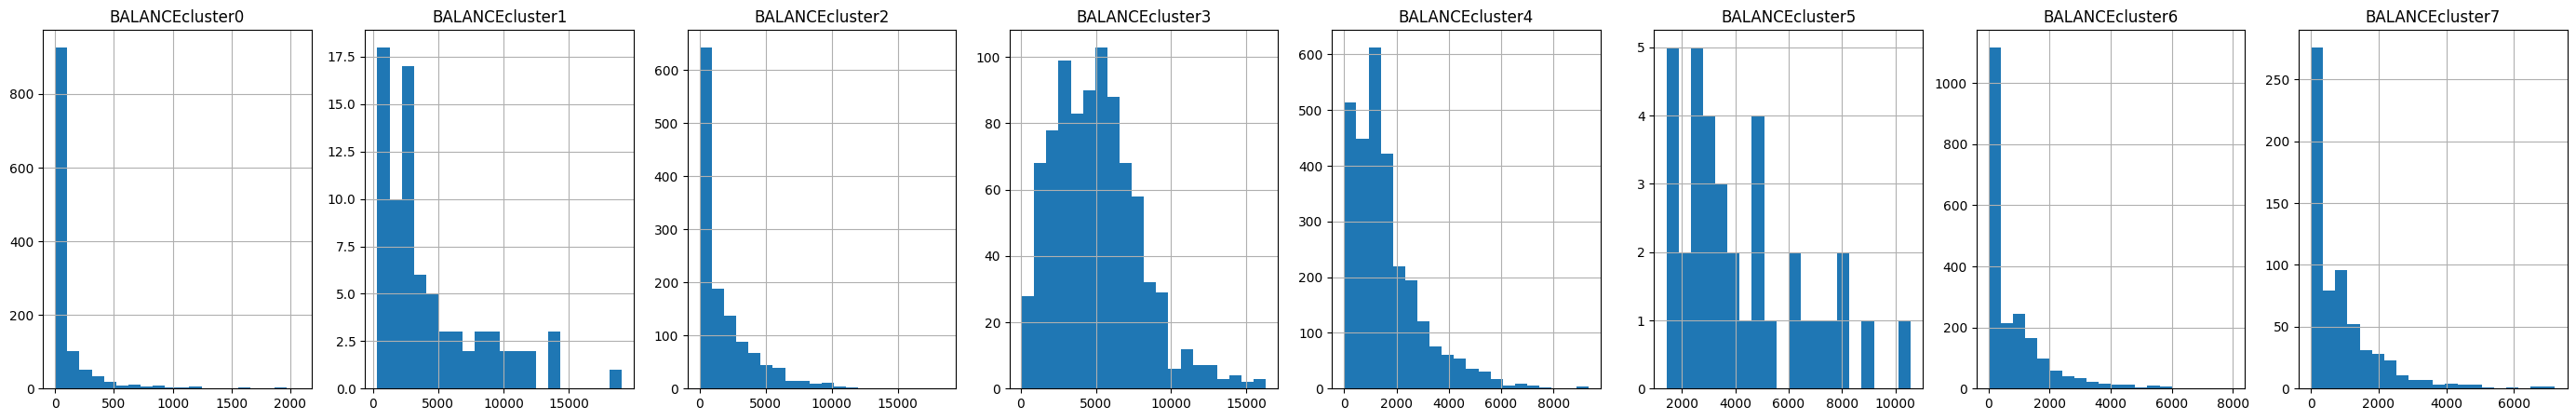

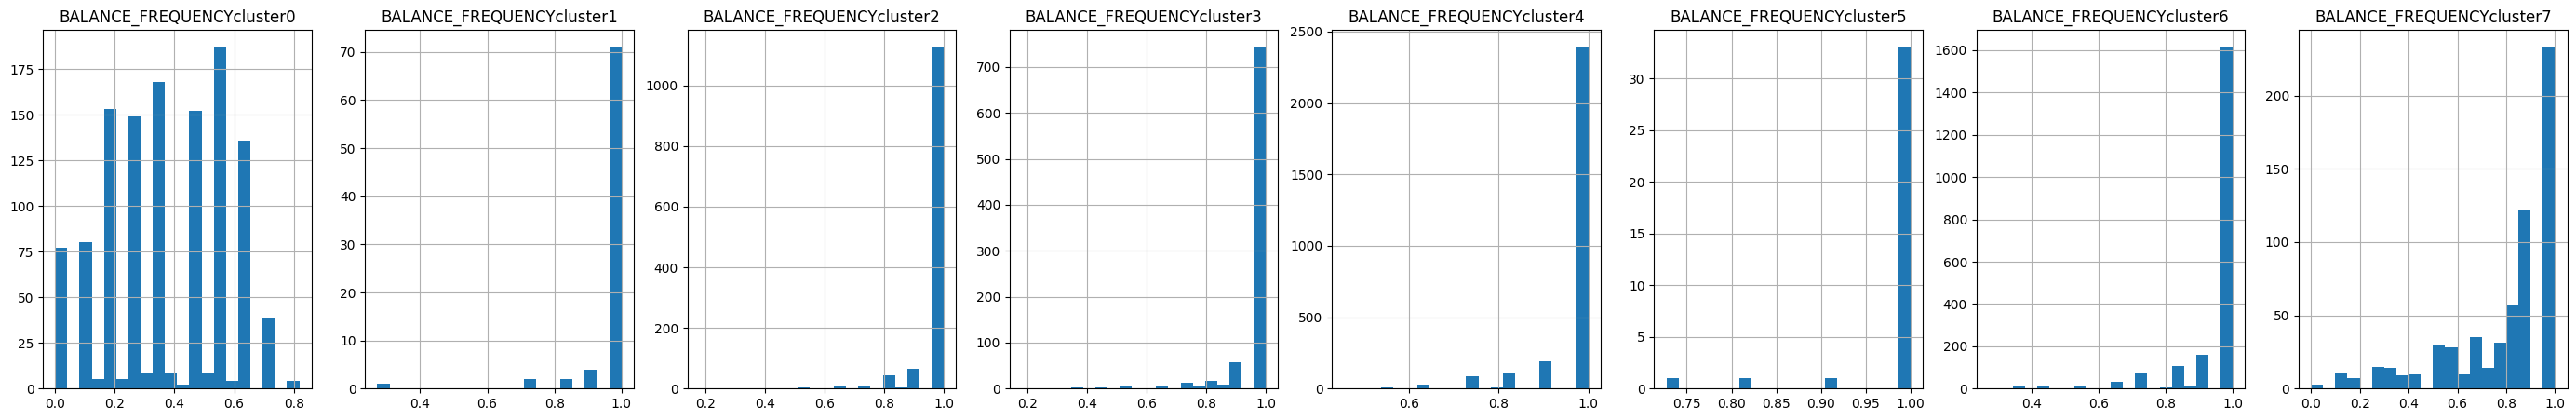

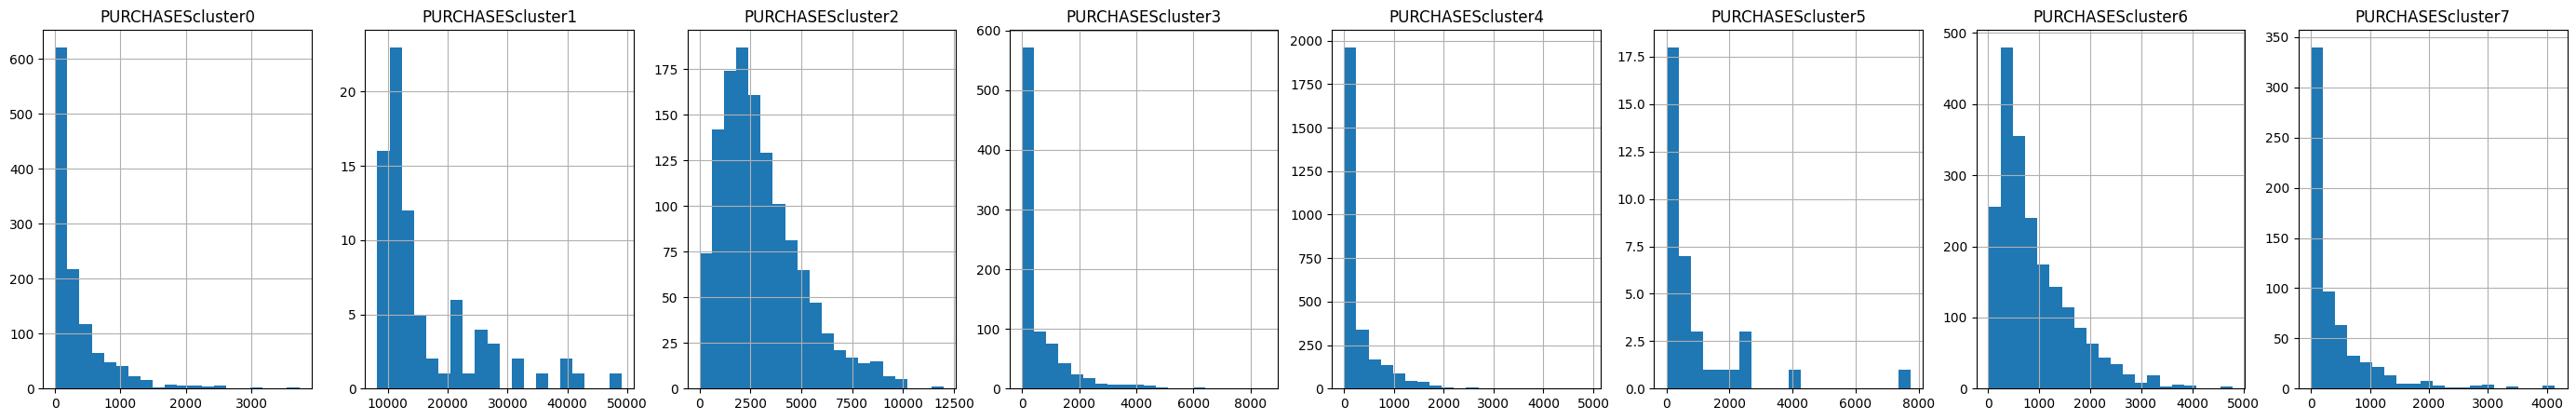

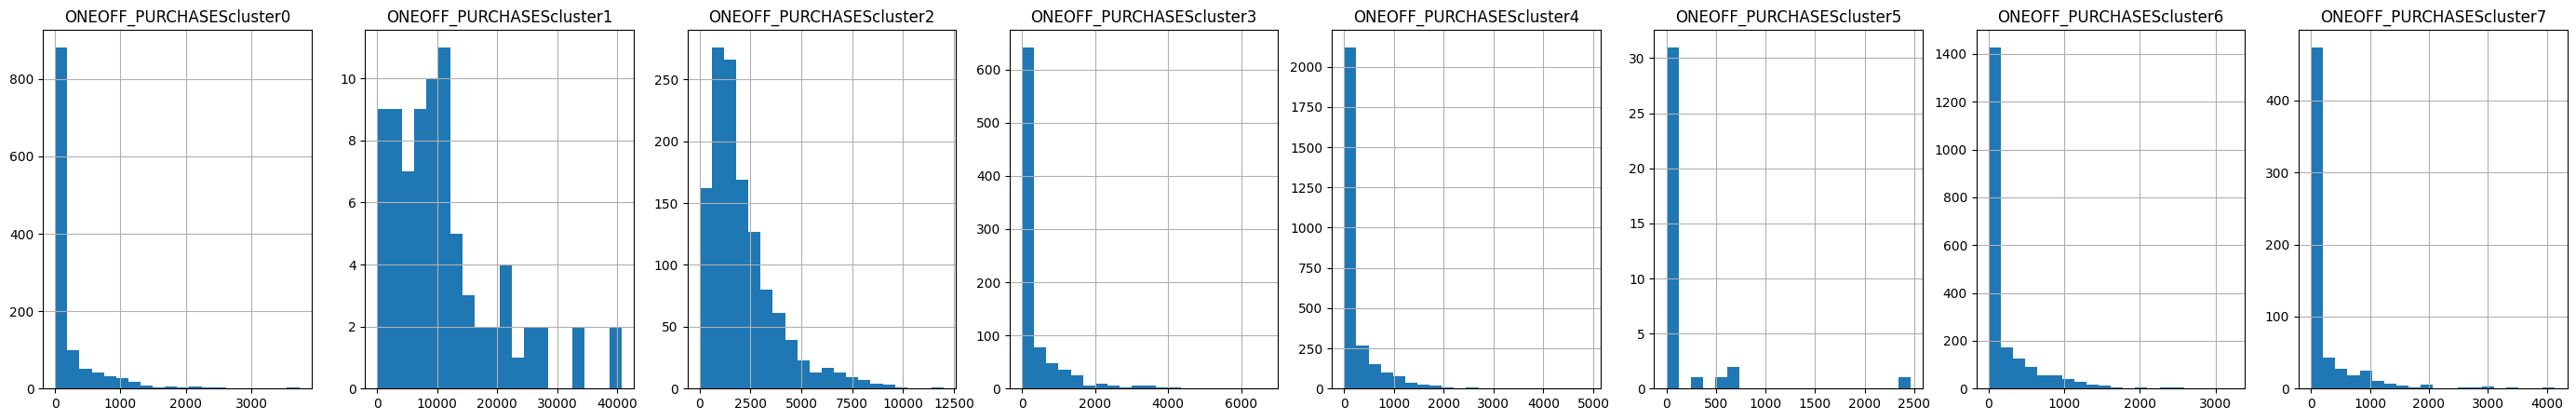

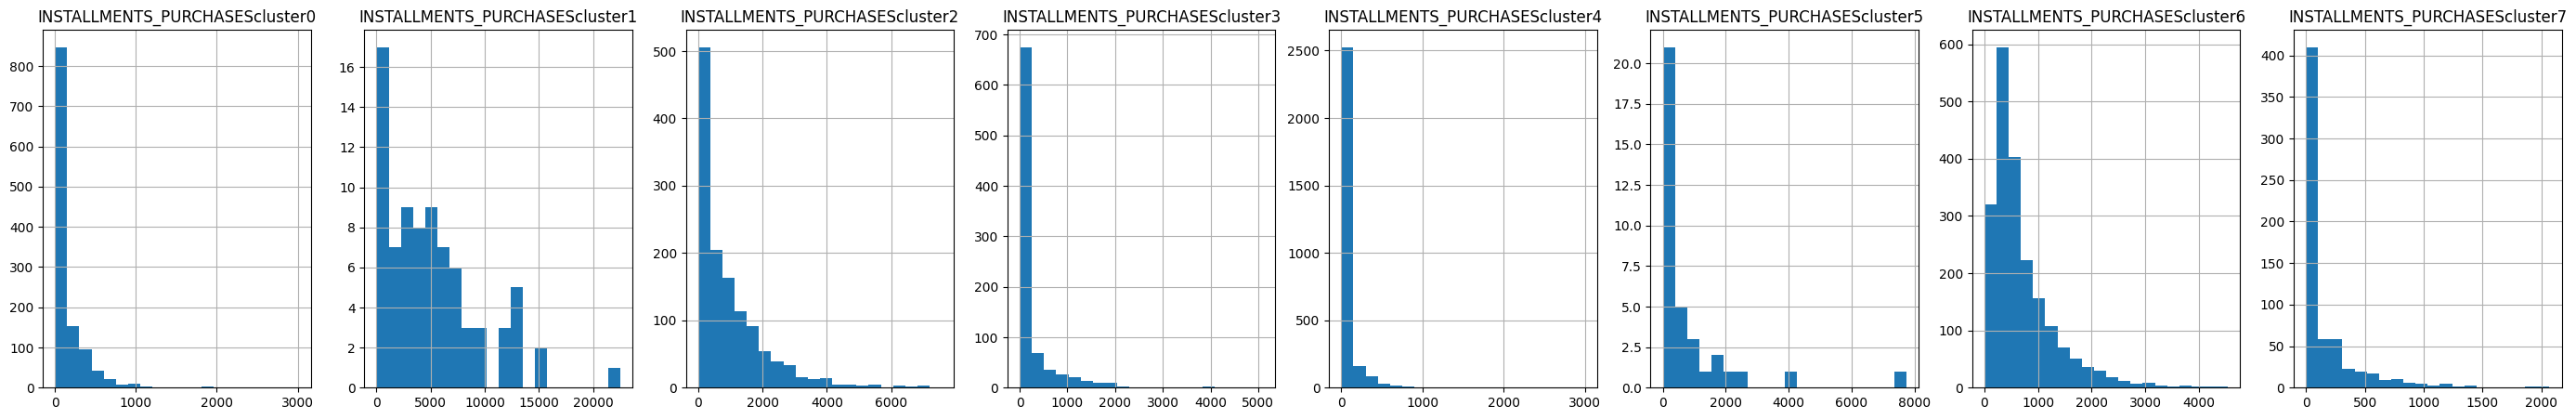

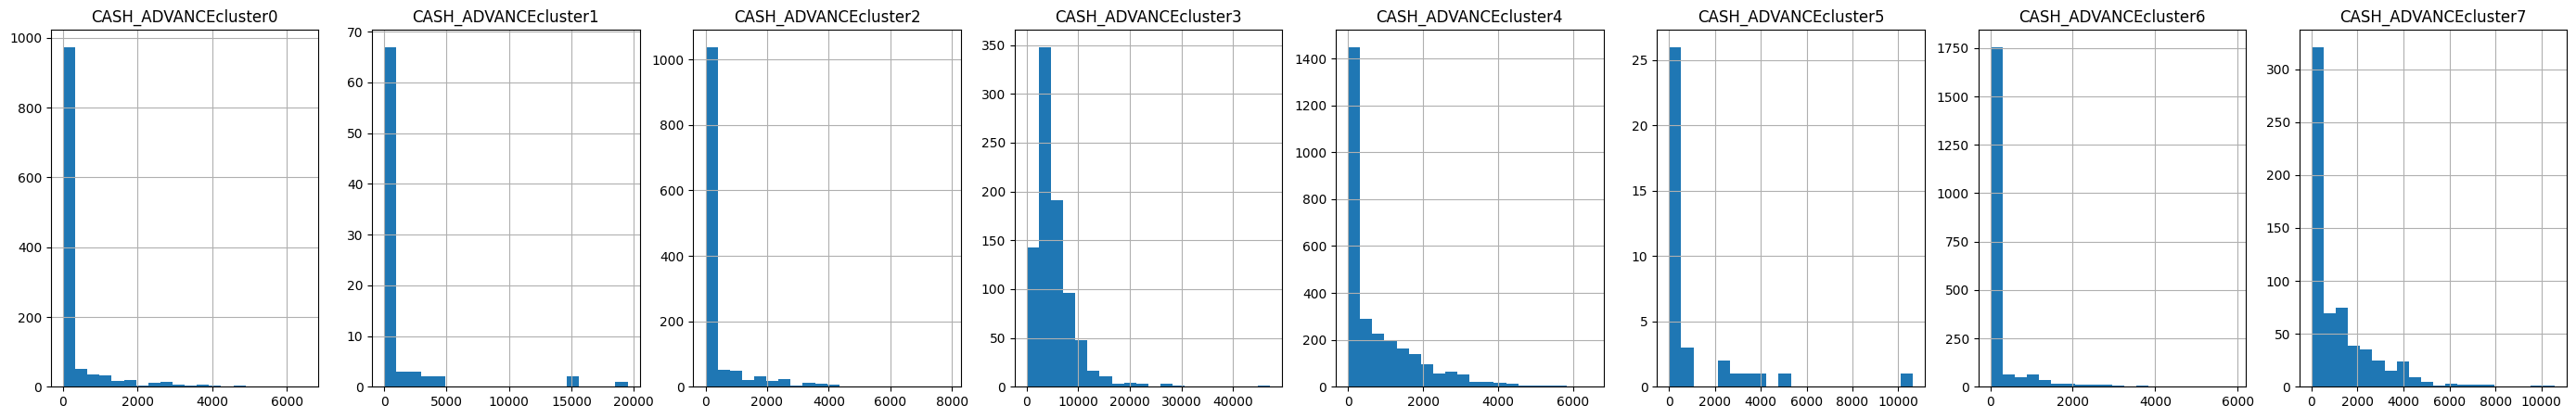

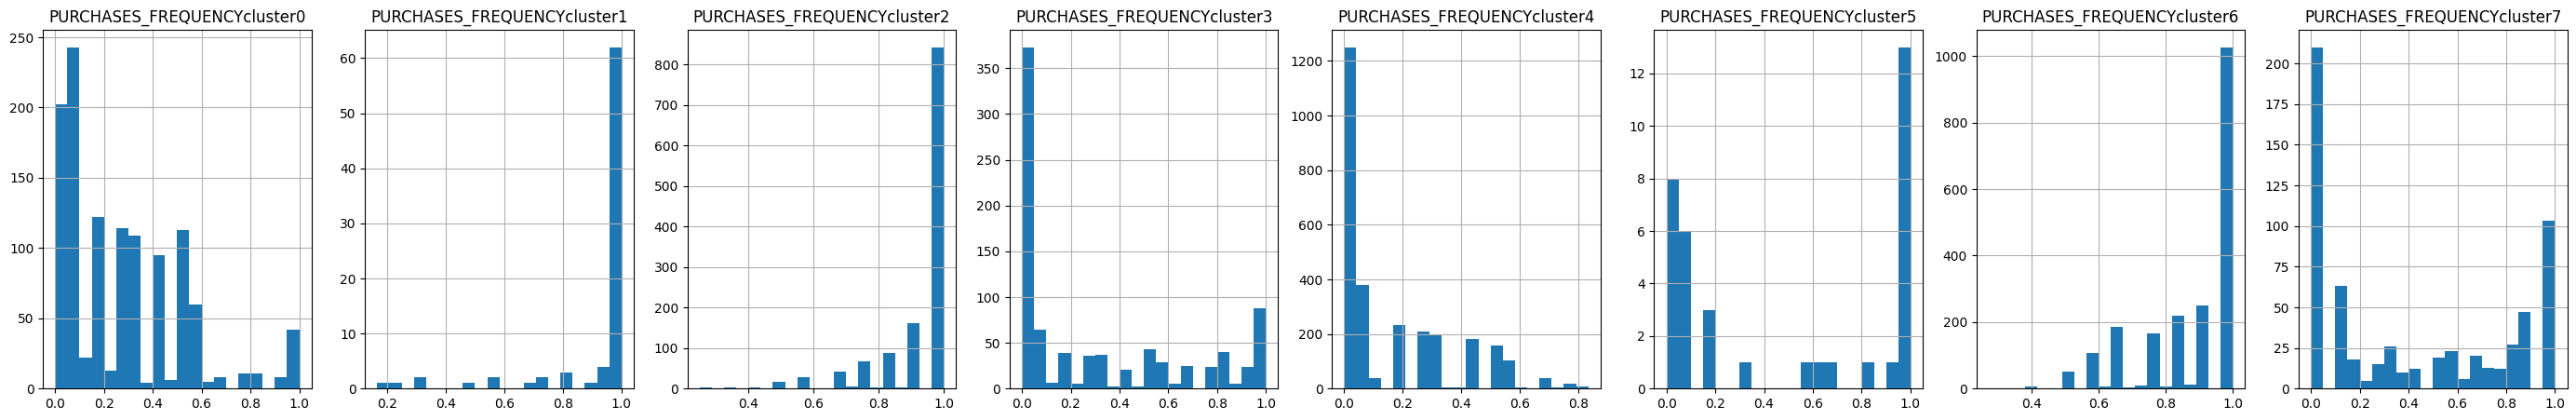

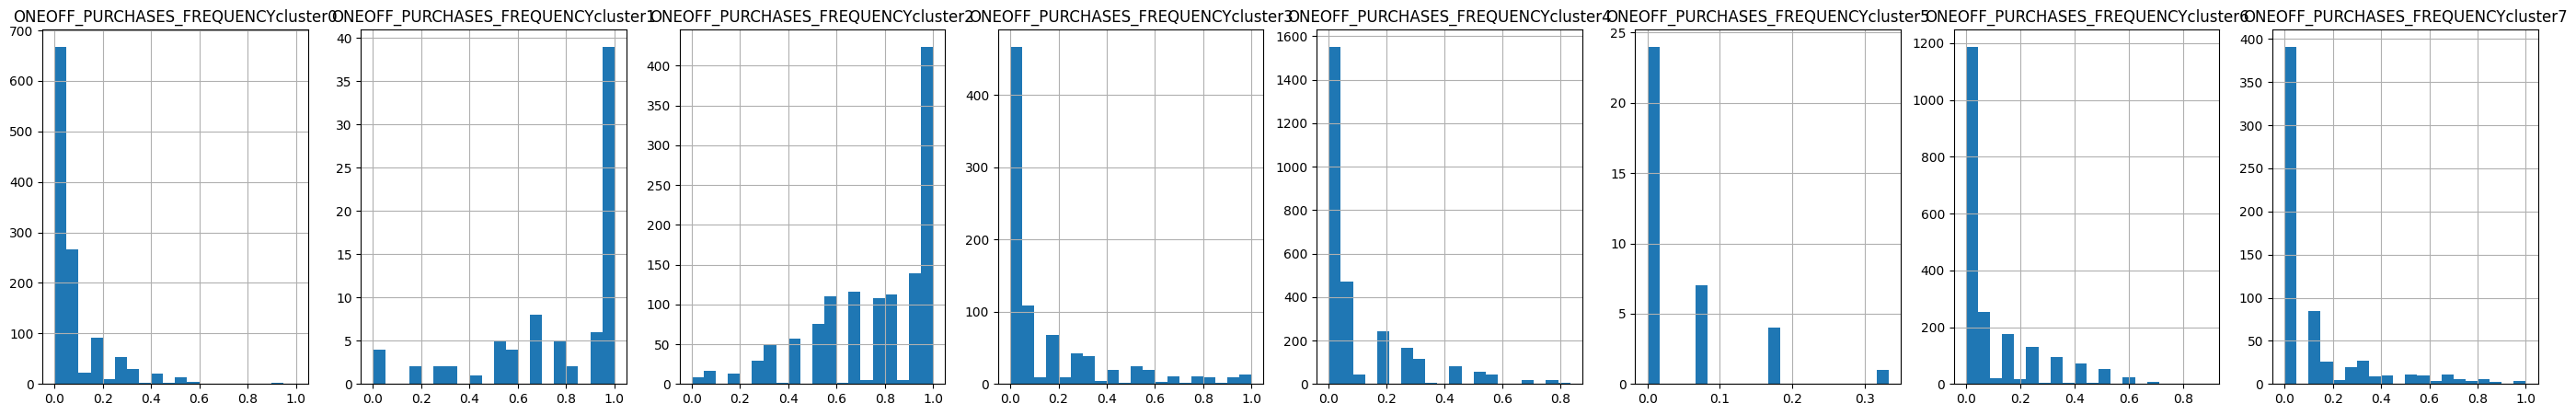

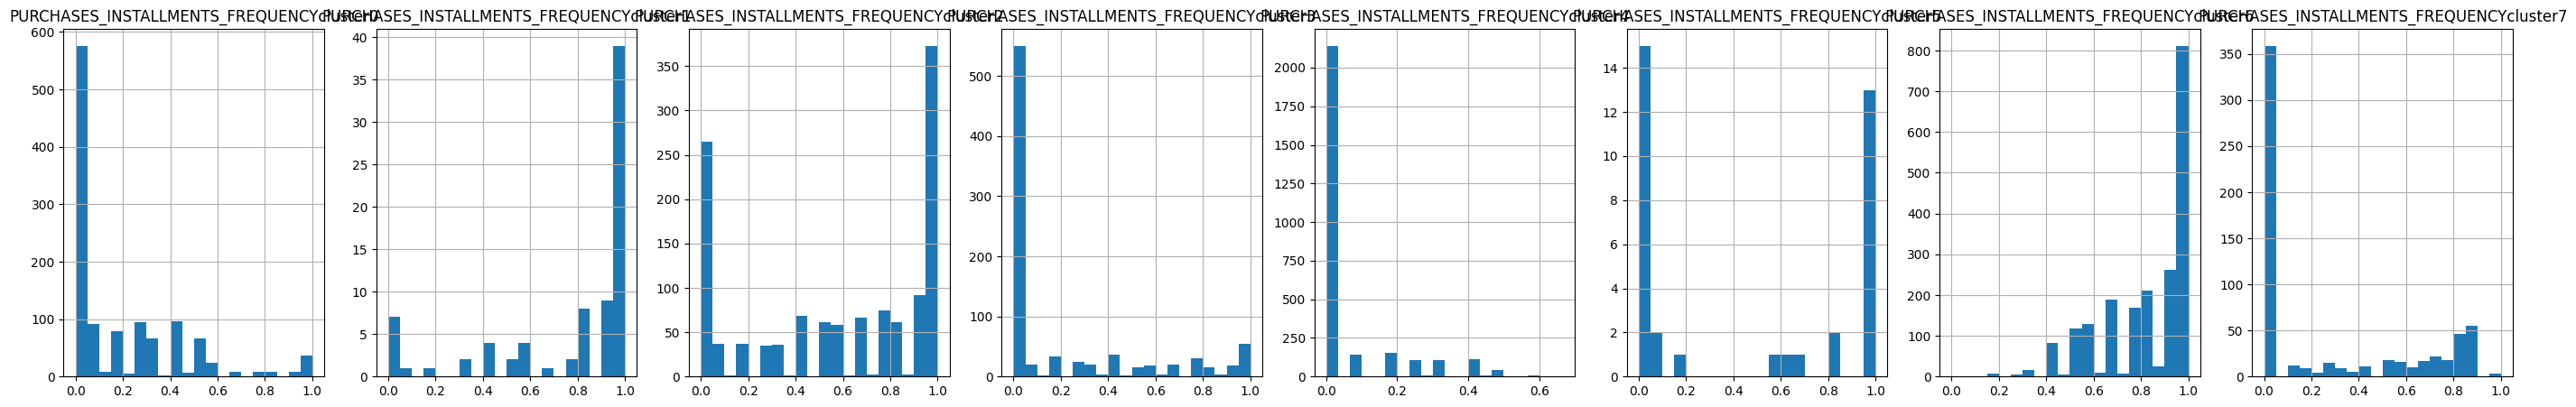

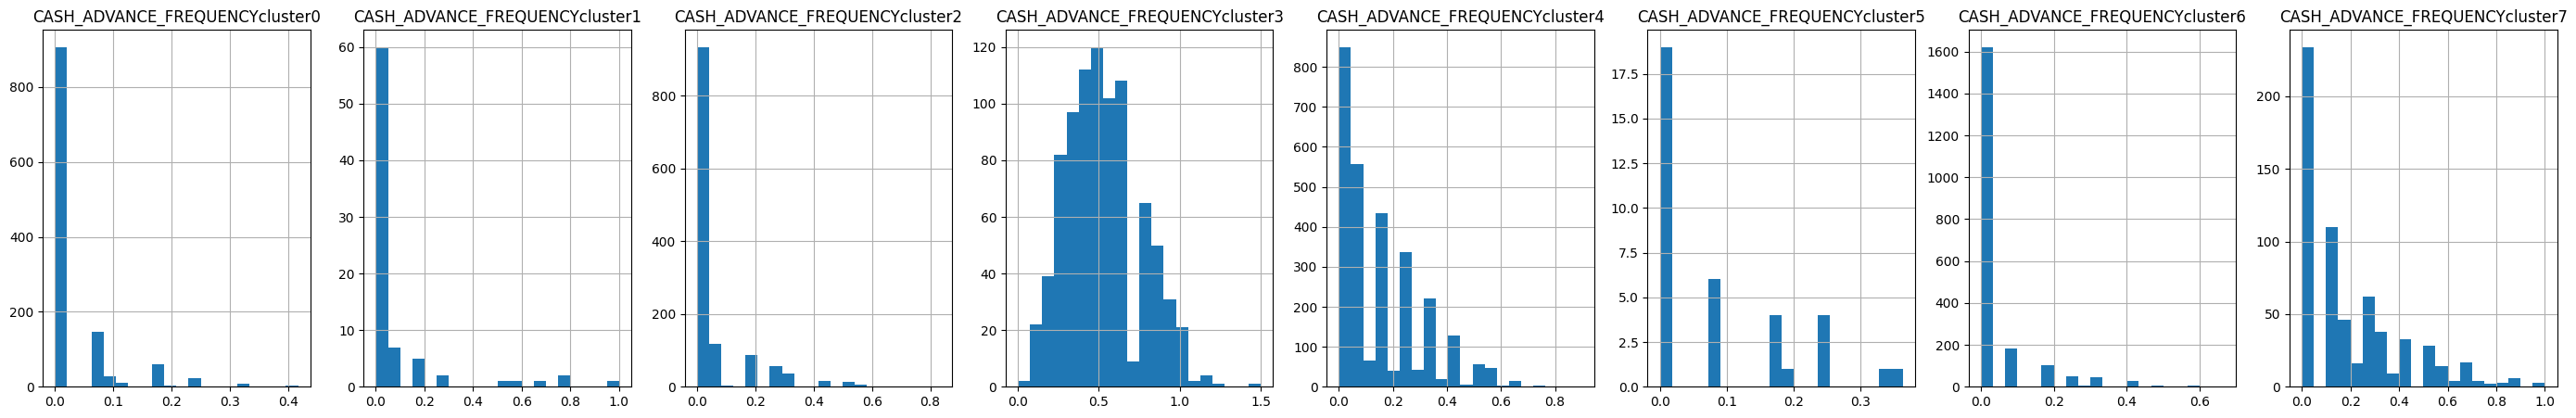

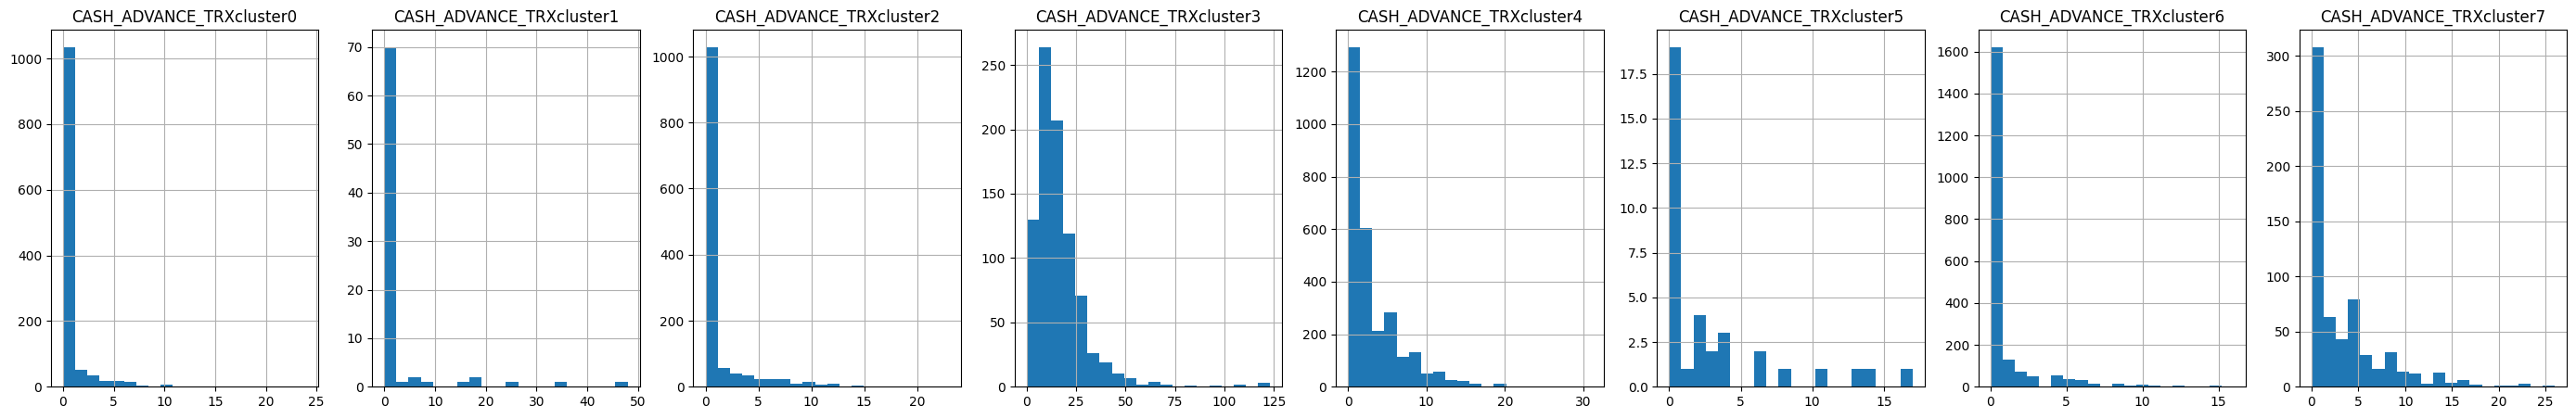

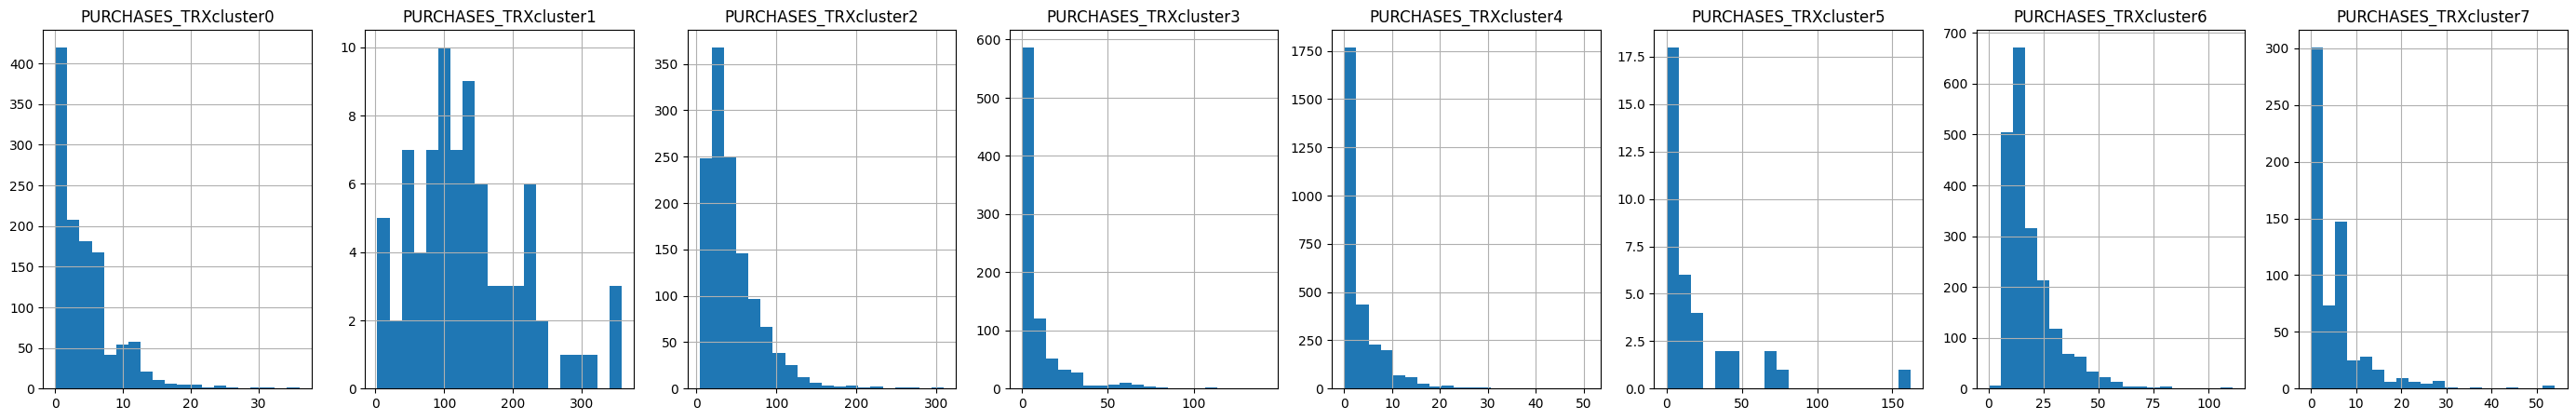

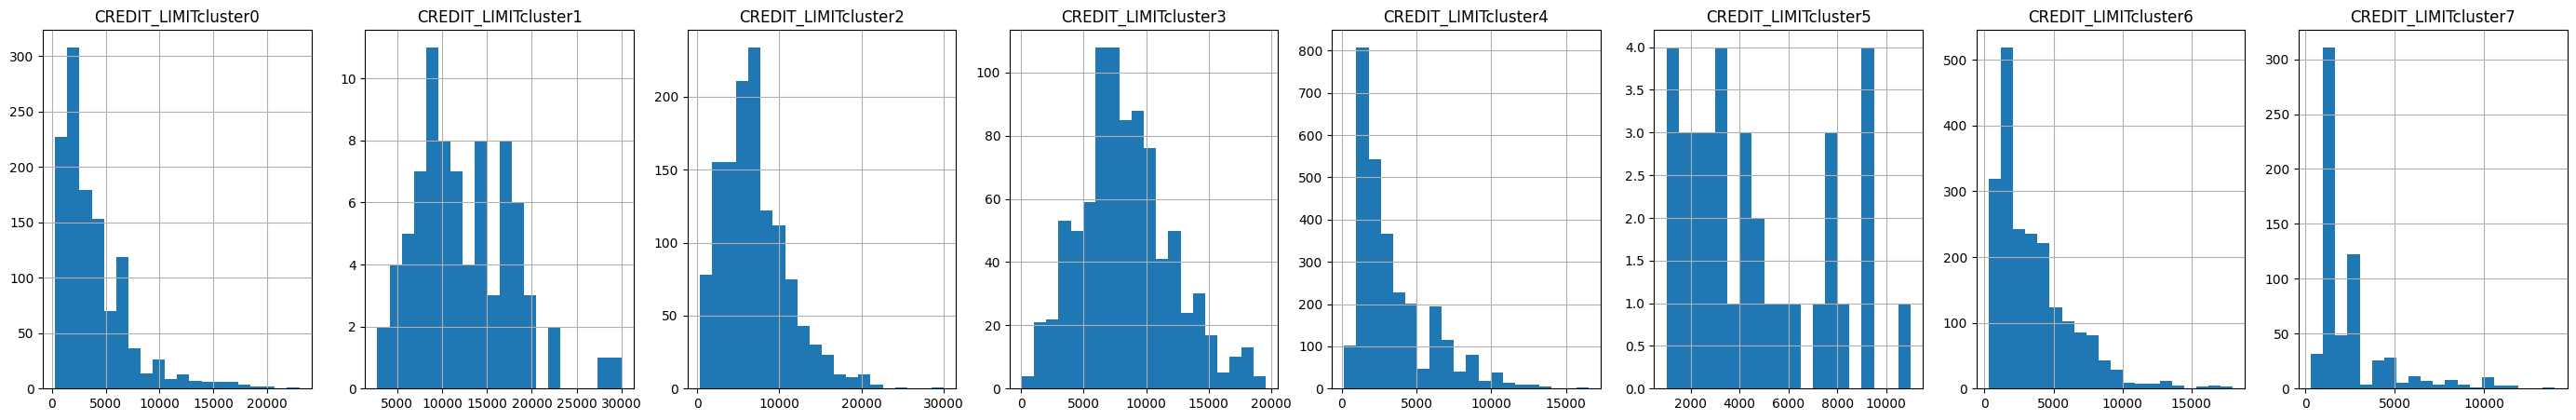

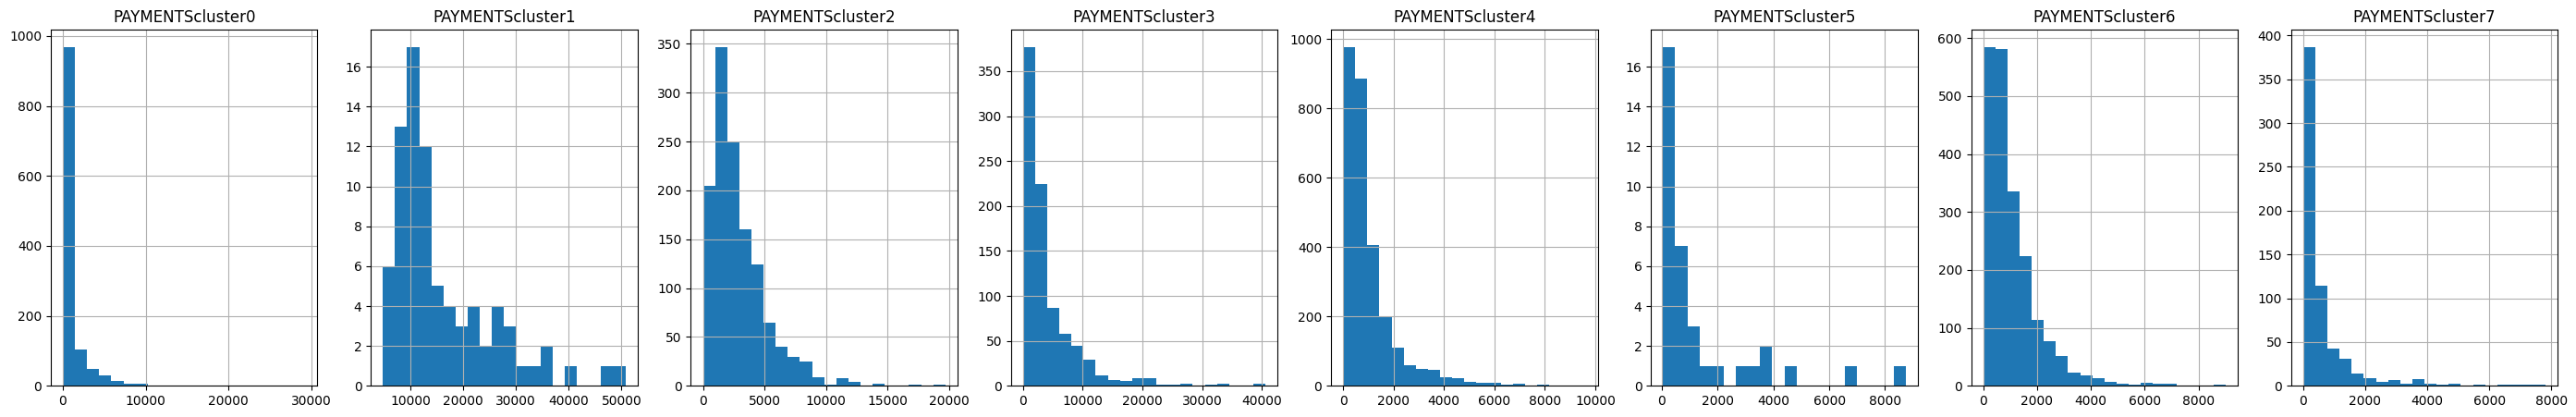

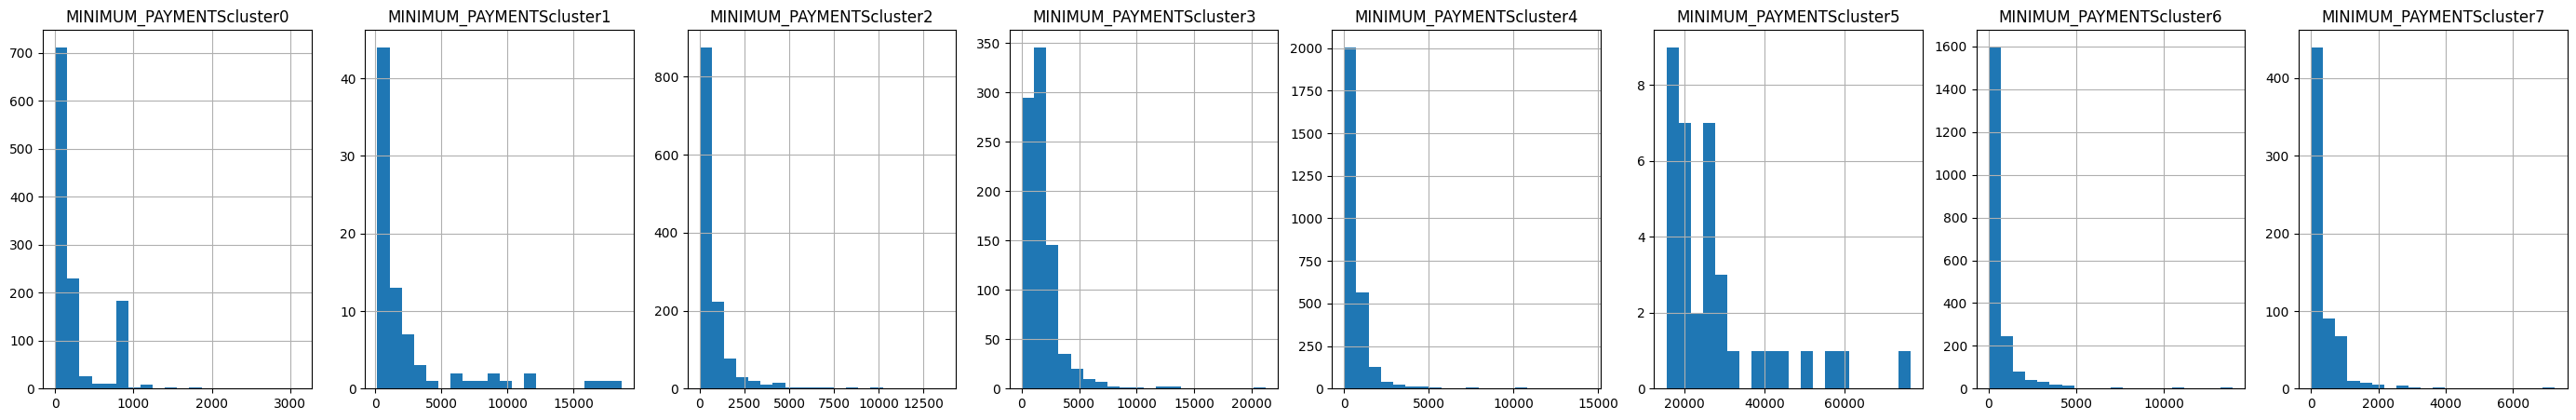

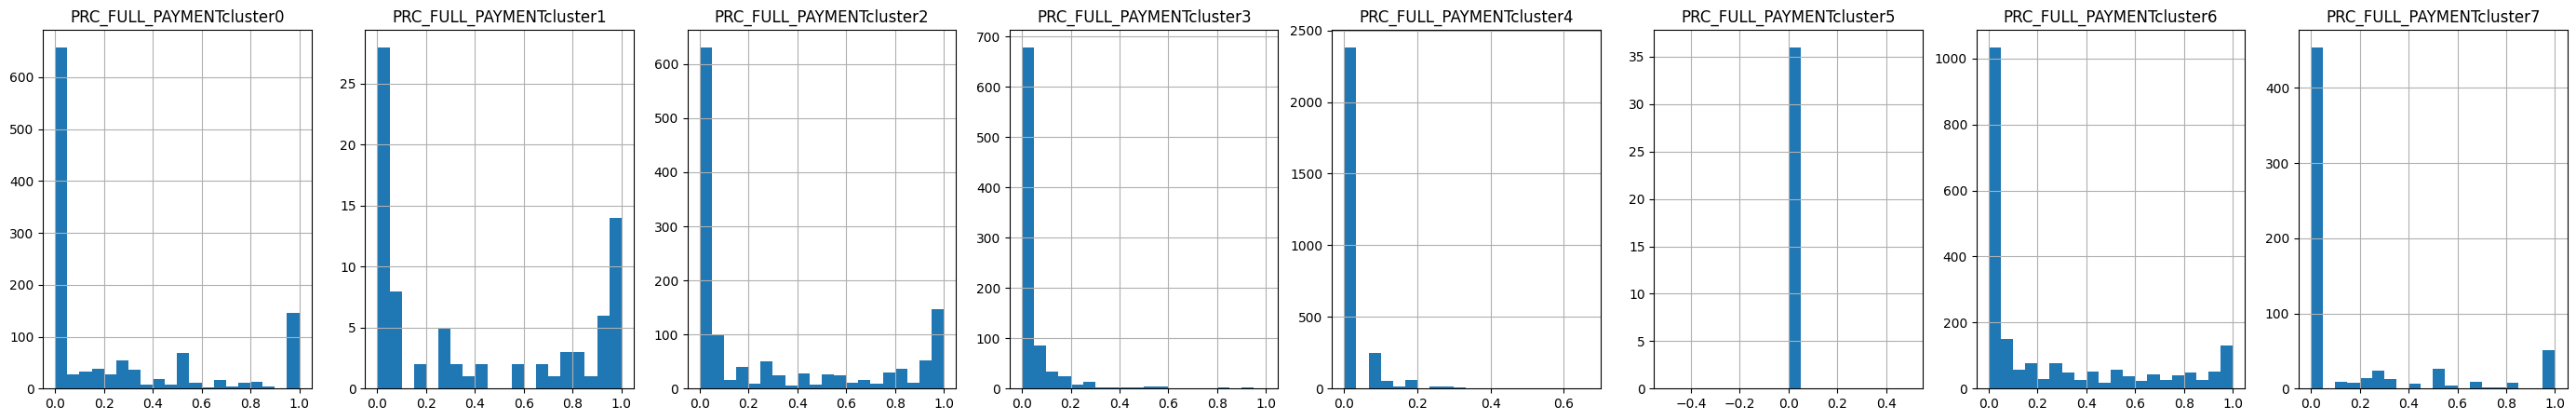

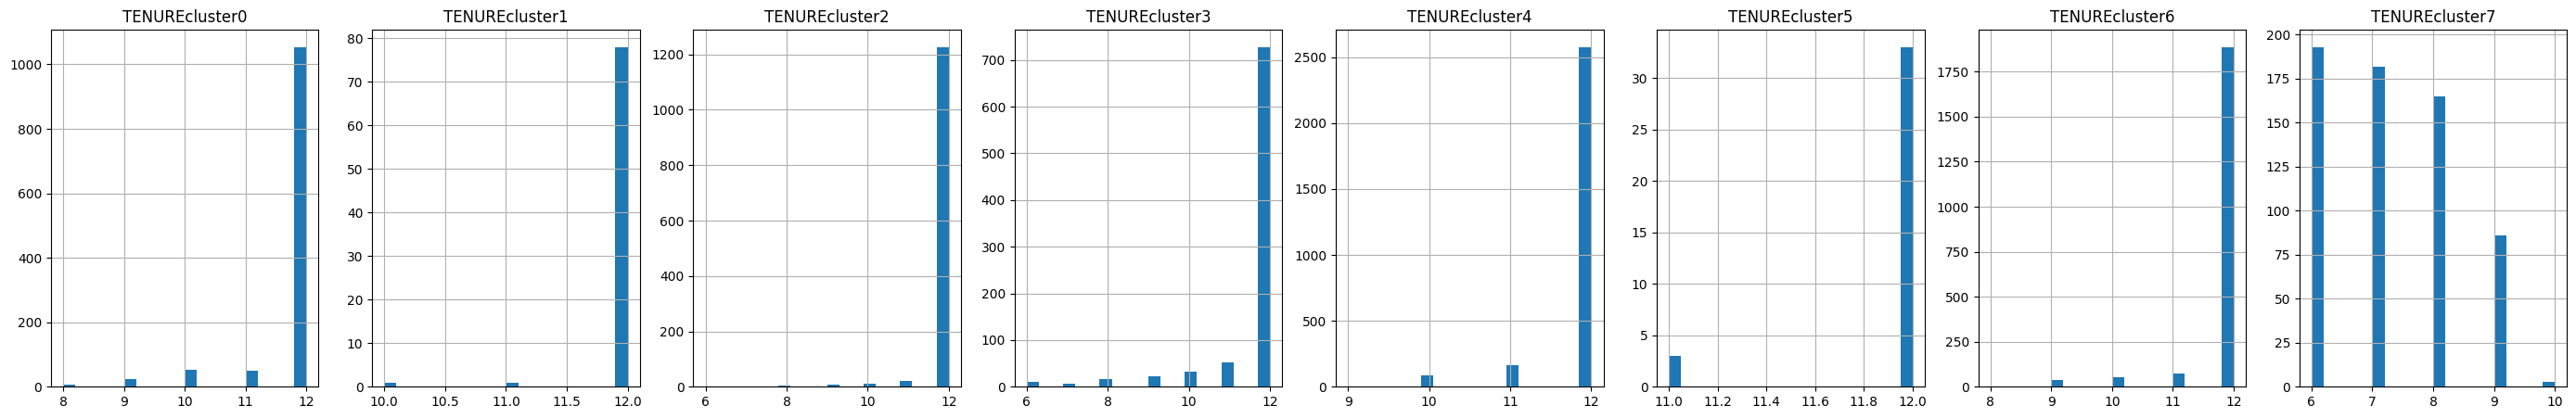

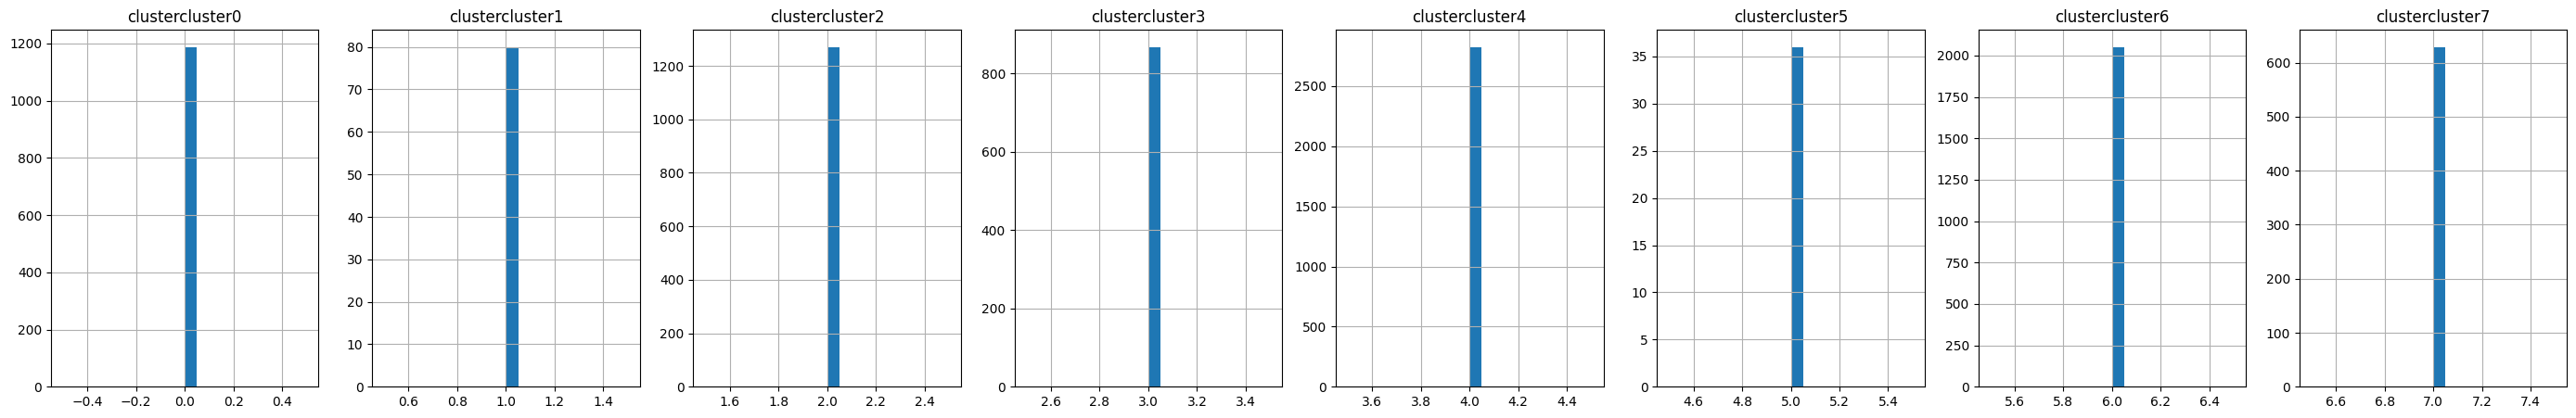

In [65]:
#plot the hist for each clusters
for i in dataset.columns:
  plt.figure(figsize=(35,5))
  for j in range(0,8):
    plt.subplot(1,8,j+1)
    cluster = dataset[dataset['cluster']==j]
    cluster[i].hist(bins=20)
    plt.title(i+'cluster'+str(j))
  plt.show()

Cluster 1 -

# **Apply Principal Component Analysis and Visualize the Results**

In [66]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [72]:
pca_data = pca.fit_transform(data)

In [75]:
pca_data = pd.DataFrame(pca_data,columns=['PC1','PC2'])

In [79]:
pca_data['label'] = labels

In [81]:
pca_data

,PC1,PC2,label
0,-1.682219,-1.076448,4
1,-1.138292,2.506483,3
2,0.969683,-0.383528,2
3,-0.873626,0.043171,4
4,-1.599433,-0.688579,4
...,...,...,...
8945,-0.359629,-2.016144,7
8946,-0.564368,-1.639119,7
8947,-0.926203,-1.810784,7
8948,-2.336552,-0.657964,7


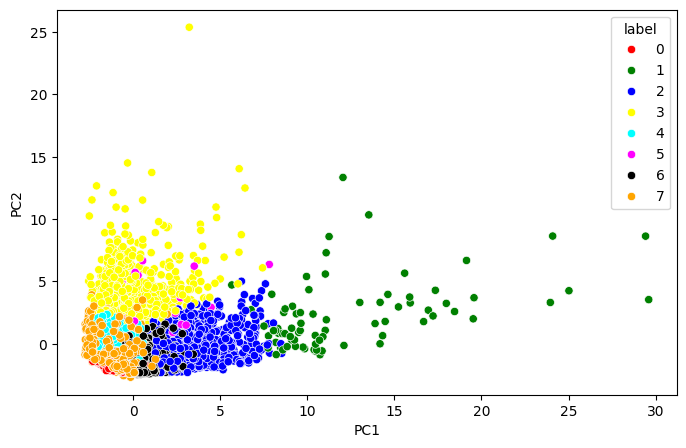

In [84]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x='PC1',y='PC2',hue='label',data=pca_data,palette=['red','green','blue','yellow','cyan','magenta','black','orange'])
plt.show()